# Solving Differential Equations using Numerical Methods

## 1. Introduction

This notebook is an introductory class to how to solve differential equations using numerical simulations. It has been implemented using Julia running on  Jupyter labs. We start by defining our problem as an irreversible chemical reaction in the following form. 

$$ a + b \rightarrow c \tag{1}$$

where `a,b,c` are chemical species, and the rate or _speed_ of the reaction is determined by the reaction rate constant `k`. This value can be identified as the probability that a collision between `a` and `b` succesfully produces a molecule `c`.

Using the __Mass Action Law__, we can derive the differential equations corresponding to this reaction. The general formulation of the system of differential equations can be expressed as:

$$ u' = f(u,p,t) \tag{2}$$

where `f` is a general vector function that depends on the parameters `p` of the system, the time variable `t`. For our particular case, the equations of our system are :

$$\begin{align}
\frac{da}{dt} &= -k \cdot a \cdot b \tag{3}\\
\frac{db}{dt} &= -k \cdot a \cdot b \tag{4}\\
\frac{dc}{dt} &= k \cdot a \cdot b \tag{5}
\end{align}$$


We will write the variables `a,b,c`  in the form of a __state vector__, i.e., a column vector that contains all the variable of the system variables. In this particular problem:

$$u=\begin{bmatrix}
a\\ 
b\\ 
c\tag{6}
\end{bmatrix}$$

## 2. Euler Method
The Euler method is the simplest most straightforward explicit algorithm to solve numerically a set differential equations. Althgough it is very simple, the Euler method often serves as the basis to construct more complex methods to solve systems of equations nukerically. Here, a differential equation can be thought of as a formula by which the slope of the tangent line to the curve can be computed at any point on the curve, once the position of that point has been calculated. The idea is that while the curve is initially unknown, its starting point (i.e., its in initial condition, which we denote by `u₀`), is know. Then, from the differential equation, the slope to the curve at `u₀` can be computed, and so, the tangent line.

<img src="Euler_method.png" width="200"/>

Take a small step along that tangent line up to a point `u1`. Along this small step, the slope does not change too much, so 
the point `u1` will be close to the curve. We can then continue the same reasoning for `u2`,`u3` and so on. 

Here we will learn how to implement this method on a computer using any programing language. This notebook has been designed using Julia. 


We start by defining a set of initial conditions for the state vector:

In [1]:
u₀=[0.02,0.01,0];

Next, we define a vector `time_span`, that determines the time where the equations will be solved

In [2]:
tspan = LinRange(0,100,100)

100-element LinRange{Float64}:
 0.0,1.0101,2.0202,3.0303,4.0404,…,95.9596,96.9697,97.9798,98.9899,100.0

The results will be saved in a matrix `U`. This matrix will be initialized with the same number of rows of the state vector `u`, and same number of columns equal to the time vector `tspan`.

In [3]:
U=zeros((size(u₀,1), size(tspan,1)));

The first row of the matrix `U` will be the state of the of the system at `t=0`, so it is equal to the vector of initial conditions `u0`:

In [4]:
U[:,1]=u₀;

Finally, we need to set a value for the kinetic rate constant $k$:

In [5]:
k=1;

We will use each row of the matrix to save the value of each variable `a,b,c` for each time point in the simulation `a=U[1], b=U[2], c=U[3]`. This way, the set of Eqs 2.3 will be solved iteratively, i.e., the value of `U(t-1)` will be used to calculate the value of `U(t)`. We will iterate as many times as the length of the time vector. We do this by using a `for` loop:

In [6]:
for i = 2:size(tspan,1)
           U[1,i]= U[1,i-1]-k*U[2,i-1]*U[1,i-1] # Eq 1
           U[2,i]= U[2,i-1]-k*U[2,i-1]*U[1,i-1] # Eq 2
           U[3,i]= U[3,i-1]+k*U[2,i-1]*U[1,i-1] # Eq 3
       end

Next, we rename each row as the corresponding variable and plot the results in a graph, with the x-axis as the time vector `tspan`, and the y-axis the concentration of each variable `a,b,c`:

In [7]:
a=U[1,:]
b=U[2,:]
c=U[3,:];

In [8]:
using Plots; gr(); # this is to initialize the plots package in Julia

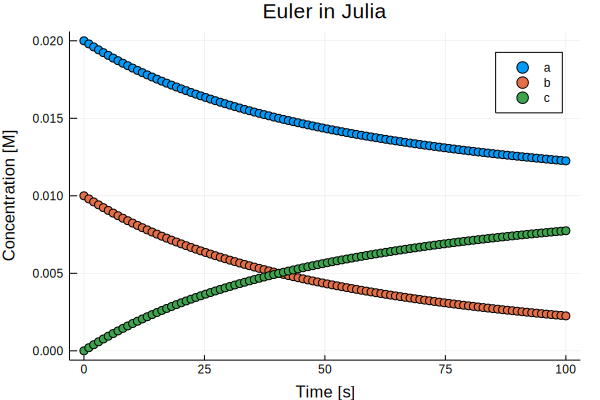

In [9]:
plot(tspan,a,label="a",seriestype=:scatter)
plot!(tspan,b,label="b",seriestype=:scatter)
plot!(tspan,c,label="c",seriestype=:scatter)
title!("Euler in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## 3. Euler with integration step

The number of times that the equation is solved is very important. If we solved it just a few times, the solution may not be accurate. If you solve the system many times, the numerical simulations can be very slow. To  define how much time passes between diferent solutions of the system, we define a `timestep`. Note that now the `tspan` vector and the number of columns of the state matrix `U` depends on the `timestep` selected.

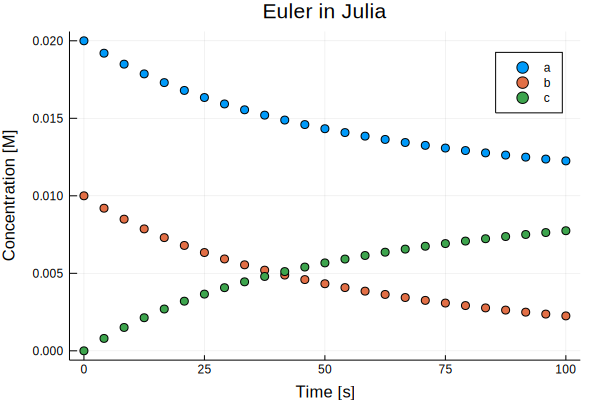

In [10]:
timestep=4
tspan=LinRange(0, 100, floor(Int,100/timestep))
U=zeros((size(u₀,1), size(tspan,1)))
U[:,1]=u₀
for i = 2:size(tspan,1)
           U[1,i]= U[1,i-1]-timestep*k*U[2,i-1]*U[1,i-1] # Eq 1
           U[2,i]= U[2,i-1]-timestep*k*U[2,i-1]*U[1,i-1] # Eq 2
           U[3,i]= U[3,i-1]+timestep*k*U[2,i-1]*U[1,i-1]  # Eq 3
       end
a=U[1,:]
b=U[2,:]
c=U[3,:]
plot(tspan,a,label="a",seriestype=:scatter)
plot!(tspan,b,label="b",seriestype=:scatter)
plot!(tspan,c,label="c",seriestype=:scatter)
title!("Euler in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

To compare how close are we to the analytical solutions, we can solve it and add it to the plot

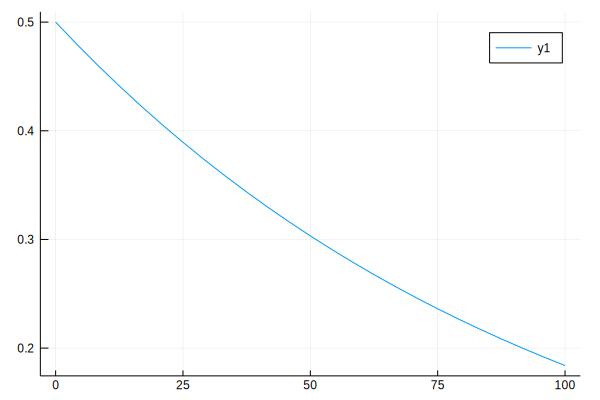

In [11]:
plot(tspan,(U[2,1]/U[1,1])*exp.(k.*tspan.*(U[2,1]-U[1,1])))

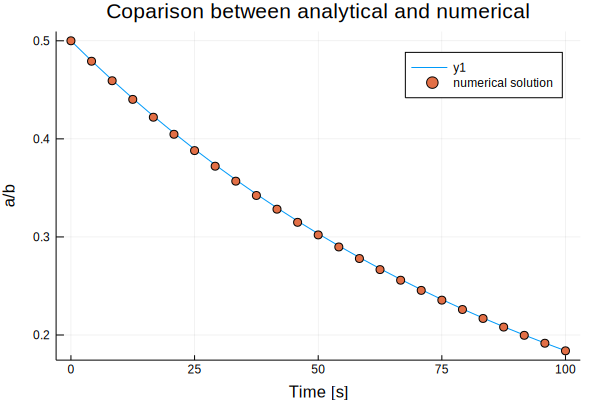

In [12]:
plot!(tspan,b./a,seriestype=:scatter,label="numerical solution")
title!("Coparison between analytical and numerical")
xlabel!("Time [s]")
ylabel!("a/b")

## 4. Differential equations solvers

Normally, each modern language has implememted solvers for dinamical systems in the form of differential equations. In Julia, we first need to initialize the package for differenetial equations

In [13]:
using DifferentialEquations

Next, we have to define a function `f` as a set of equations that result from the mass action analysis. To define a system of differential equations in DifferentialEquations.jl, we define our `f` as a vector function with a state vector vector `u` and parameters vector `p`. Thus, for the vector `u = [x,y,z]'`, we have the derivative function:

In [14]:
function simpleODE1!(du,u,p,t)
    k = p
    du[1] = -k*u[1]*u[2]
    du[2] = -k*u[1]*u[2]
    du[3] = k*u[1]*u[2]   
end

simpleODE1! (generic function with 1 method)

Notice here we used the in-place format which writes the output to the preallocated vector `du`. For systems of equations the in-place format is faster.  For our model, the only parameter is the rate constant `k`, therefore we build the parameter collection `p` as:

In [15]:
k=1;
p=(k);
u₀=[0.02,0.01,0];

Next, we define the `tspan` vector. Note that now, the vector has only two components: the initial and final time point for the simulation

In [16]:
tspan = (0.0,100.0);

Now we define a `ODEProblem` type using the constructor call. This is done by specifying this function `simpleODE`, the initial condition `u0`, the time span `tspan` and the parameters  `p`:

In [17]:
prob1 = ODEProblem(simpleODE1!,u₀,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.02, 0.01, 0.0]

Now, we solve the problem:

In [18]:
sol1 = solve(prob1)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 9-element Array{Float64,1}:
   0.0                
   0.15383356961677971
   1.6921692657845766 
   8.271827791540357  
  19.86176245334914   
  35.92987335869888   
  57.673911215070845  
  85.79206764253748   
 100.0                
u: 9-element Array{Array{Float64,1},1}:
 [0.02, 0.01, 0.0]                  
 [0.0199693, 0.0099693, 3.06959e-5] 
 [0.01967, 0.00966995, 0.000330049] 
 [0.018529, 0.00852899, 0.00147101] 
 [0.0169472, 0.00694719, 0.00305281]
 [0.0153629, 0.00536295, 0.00463705]
 [0.0139056, 0.00390558, 0.00609442]
 [0.0126907, 0.00269073, 0.00730927]
 [0.012254, 0.00225402, 0.00774598] 

`sol1.t` stores the time points and `sol1.u` is an array storing the solution at the corresponding time points. 

However, when dealing with systems of equations, `sol1` also acts like an array. `sol1[i]` returns the solution at the `i`th time point.

In [19]:
sol1.t[3],sol1.u[3]

(1.6921692657845766, [0.01967, 0.00966995, 0.000330049])

Additionally, the solution acts like a matrix where `sol[j,i]` is the value of the `j`th variable at time `i`:

In [20]:
sol1[:,3]

3-element Array{Float64,1}:
 0.019669951491554746
 0.009669951491554744
 0.000330048508445255

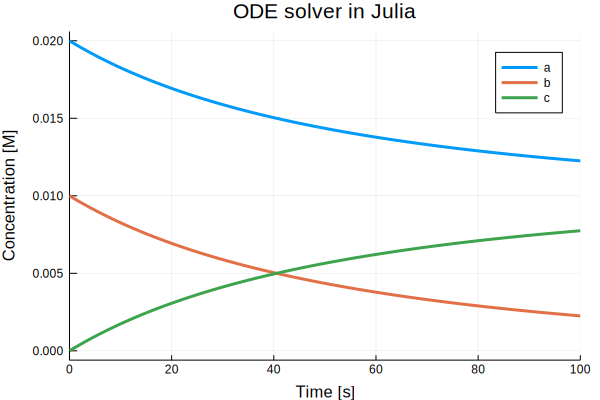

In [21]:
plot(sol1,label=["a","b","c"])
title!("ODE solver in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

One interesting feature is that, by default, the solution is a continuous function. So you do not need to extrapolate to a curve

In [22]:
sol1(60.4)

3-element Array{Float64,1}:
 0.013761040160814916 
 0.0037610401608149106
 0.006238959839185087 

We can see how the implemented ODE solver chooses the time variable depending of the stiffness of the solution of the ODE. This saves a lot of time and computer power. Quite often, each ODE solver handles the integration time diferently, and choosing one or the other is impontant and depends on the problem to solve. We can see that the stock solver in Julia only solves the following few points

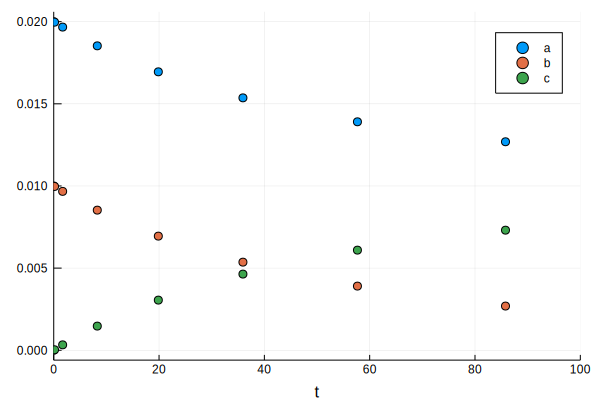

In [23]:
sol1 = solve(prob1,dense=false)
plot(sol1,label=["a","b","c"],seriestype=:scatter)

### 5.1 A DSL for Parameterized Functions

In many cases you may be defining a lot of functions with parameters. There exists the domain-specific language (DSL) defined by the `@ode_def` macro for helping with this common problem. Using this feature in Julia, we can rewrite the `simpleODE!` function as:

In [24]:
simpleODE3! = @ode_def abetterway begin
  da = -k*a*b
  db = -k*a*b
  dc = k*a*b
    end k

(::abetterway{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

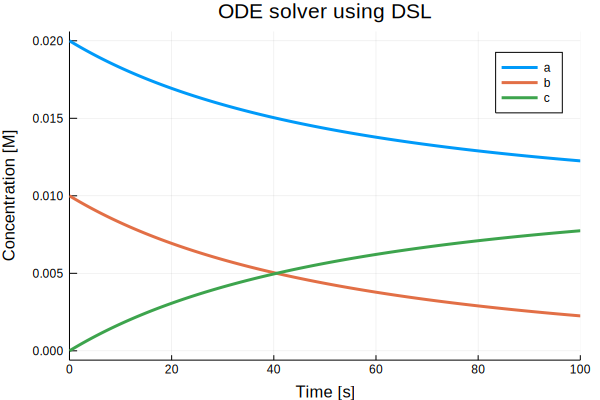

In [25]:
prob3 = ODEProblem(simpleODE3!,u₀,tspan,p)
sol3 = solve(prob3)
plot(sol3,label=["a","b","c"])
title!("ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## 5. Reversible reactions and equilibrium 

Now we will use the same approach  to solve the reversible reaction 

$$ a + b \leftrightarrow  c \tag{7}$$

with rate constants `k1`, and `k2` for the forward and reverse reaction. Based on mass action kinetics, the differential equations to solve now are:


$$ \frac{da}{dt} = -k_1 \cdot a \cdot b + k_2 \cdot c \tag{8}$$

$$ \frac{db}{dt} = -k_1 \cdot a \cdot b + k_2 \cdot \tag{9}c$$

$$ \frac{dc}{dt} = k_1 \cdot a \cdot b - k_2 \cdot \tag{10}c$$


Now, $p$ that holds the parameters required to solve the system is a vector of two components  $k_1$, and $k_2$. So

In [26]:
k1=1
k2=0.01
p = (k1,k2); # we could also make this an array, or any other type!

In [27]:
function simpleODErev!(du,u,p,t)
    k1,k2 = p
    du[1] = -k1*u[1]*u[2]+k2*u[3]
    du[2] = -k1*u[1]*u[2]+k2*u[3]
    du[3] = k1*u[1]*u[2]-k2*u[3] 
end

simpleODErev! (generic function with 1 method)

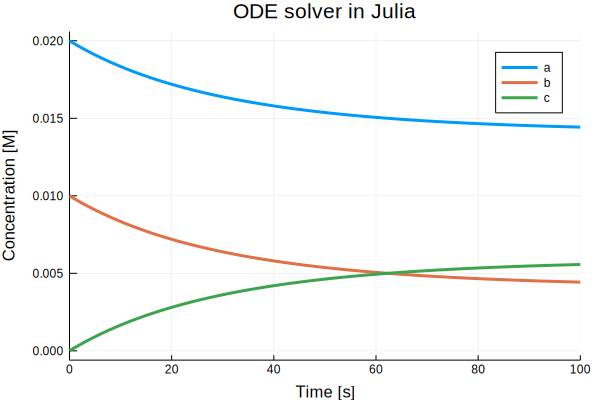

In [28]:
prob4 = ODEProblem(simpleODErev!,u₀,tspan,p)
sol4 = solve(prob4)
plot(sol4,label=["a","b","c"])
title!("ODE solver in Julia")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

or, using the DSL notation

In [29]:
simpleODE2_rev! = @ode_def abetterway begin
  da = -k1*a*b+k2*c
  db = -k1*a*b+k2*c
  dc = k1*a*b-k2*c
    end k1 k2

(::abetterway{getfield(Main, Symbol("##11#15")),getfield(Main, Symbol("##12#16")),getfield(Main, Symbol("##13#17")),Nothing,Nothing,getfield(Main, Symbol("##14#18")),Expr,Expr}) (generic function with 2 methods)

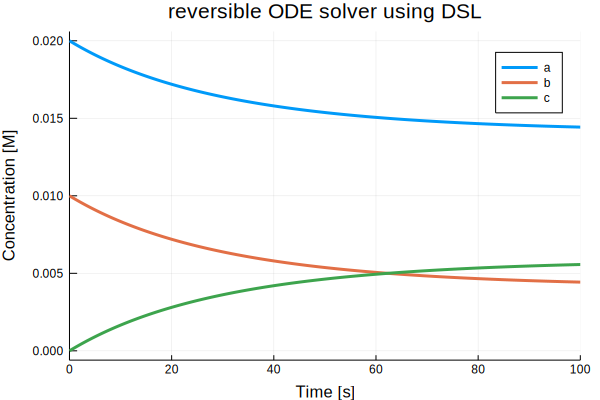

In [30]:
tspan = (0.0,100.0)
prob = ODEProblem(simpleODE2_rev!,u₀,tspan,p)
sol = solve(prob)
plot(sol,label=["a","b","c"])
title!("reversible ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

At equilibrium, when $ \frac{\mathrm{d} c_{eq}}{\mathrm{d} t}=0$, we have:

$$
\begin{align}
k_2 \cdot c_{eq}= k_1 \cdot a_{eq}\cdot b_{eq} \tag{11}\\
c_{eq}= \frac{k_1 \cdot a_{eq}\cdot b_{eq}}{k_2} \tag{12}
\end{align}
$$

In addition, since  $ \frac{\mathrm{d} c}{\mathrm{d} t}=-\frac{\mathrm{d} a}{\mathrm{d} t} $ at any time, the condition $[a]+[c]=[a_o]$ is true at all time points. thererefore we can rewrite the equilibrium equation as:
$

$$
\begin{align}
c_{eq}= \frac{k_1 \cdot (a_{0}-c_{eq})\cdot b_{eq}}{k_2} \tag{13}\\
c_{eq}= \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2}-\frac{k_1 \cdot c_{eq}\cdot b_{eq}}{k_2}  \tag{14}\\
c_{eq}+\frac{k_1 \cdot c_{eq}\cdot b_{eq}}{k_2} = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{15}\\
c_{eq}(1+\frac{k_1 \cdot b_{eq}}{k_2}) = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{16}\\
c_{eq}(\frac{k_2+k_1 \cdot b_{eq}}{k_2}) = \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2} \tag{17}\\
c_{eq}= \frac{k_1 \cdot a_{0}\cdot b_{eq}}{k_2+k_1 \cdot b_{eq}} \tag{18}\\
\end{align}
$$

so, divinding numerator and denoiminator by $k_1$
$$
\begin{align}
c_{eq}= \frac{a_{0}\cdot b_{eq}}{\frac{k_2}{k_1}+\cdot b_{eq}} \tag{19}\\
c_{eq}= \frac{a_{0}\cdot b_{eq}}{K_{eq}+\cdot b_{eq}} \tag{20}
\end{align}
$$


where $K_{eq}$ is the equilibirum constant, defined as:


\begin{equation}
K_{eq}=\frac{k_2}{k_1} \tag{21}
\end{equation}

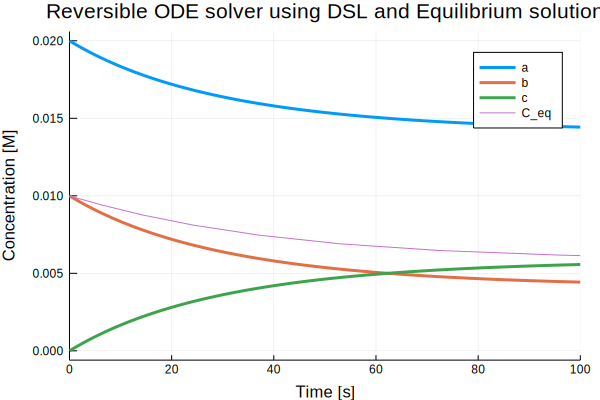

In [31]:
B=sol4[2,:]
c_eq=B*u₀[1]./(B.+(k2/k1))
plot(sol4,label=["a","b","c"])
plot!(sol4.t,c_eq,label="C_eq")
title!("Reversible ODE solver using DSL and Equilibrium solution")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

## 6. A practical case

Now we will solve the more complex reaction

$$ NaCO_3 + CaCl_2  \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  CaCO_3 + 2 NaCl \tag{22}$$



with forward and reverse kinetic constants `k1` and `k2`, respectively. We decompose the reversible reaction into two reactions:
$$\begin{align} 
 NaCO_3 + CaCl_2  &\overset{k_1}{\longrightarrow}  CaCO_3 + 2 NaCl \tag{23}\\
 CaCO_3 + 2 NaCl &\overset{k_2}{\longrightarrow} NaCO_3 + CaCl_2 \tag{24}
 \end{align}
$$


The system consists of four species $X_s=1…4$ and two reactions $k_j=1…2$. Renaming the reactants for simplicity ($a = NaCO_3$, $b  =CaCl_2$, $c  = CaCo_3$, $d = NaCl)$, we obtain

$$\begin{align} 
 a + b  &\overset{k_1}{\longrightarrow}  c + 2 d \tag{25}\\
 c + 2 d &\overset{k_2}{\longrightarrow} a + b \tag{26}
 \end{align}
$$

For this system, the stoichiometrix matrices are:
$$
A=\begin{bmatrix}
 1& 1 & 0 & 0  \tag{27}\\ 
 0 & 0 &1   &2  
\end{bmatrix} $$

$$
B=\begin{bmatrix}
0 & 0 &1   &2 \tag{28}\\ 
1 & 1 &0   &0  
\end{bmatrix}
\\
$$
The forward reaction is of order 2, the backward reaction is of order 3. Therefore, the units of $k_1 = s^{-1} M^{-1}$, and the units of $k_2 = s^{-1} M^{-2}$

Based on Mass Action Kinetics, the system of differential equations consists in the following four coupled ODEs:

$$\begin{align}        
            \frac{ da }{dt} &= - k_1 \cdot a \cdot b + k_2 \cdot c \cdot d^2  \tag{29}\\ 
            \frac{ db }{dt} &= - k_1 \cdot a \cdot b + k_2 \cdot c \cdot d^2   \tag{30}  \\
             \frac{ dc }{dt} &=  k_1 \cdot a \cdot b - k_2 \cdot c \cdot d^2  \tag{31}  \\
              \frac{ dd }{dt} &= 2 k_1 \cdot a  \cdot b - 2 k_2 \cdot c \cdot d^2   \tag{32}  \\
\end{align}
$$

Next, we solve the equations numerically:

In [32]:
simpleODE3! = @ode_def abetterway begin
  da = -k1 * a * b + k2 * c * d^2
  db = -k1 * a * b + k2 * c * d^2
  dc = k1 * a * b - k2 * c * d^2
  dd = 2 * k1 * a * b - 2 * k2 * c * d^2
    end k1 k2

(::abetterway{getfield(Main, Symbol("##19#23")),getfield(Main, Symbol("##20#24")),getfield(Main, Symbol("##21#25")),Nothing,Nothing,getfield(Main, Symbol("##22#26")),Expr,Expr}) (generic function with 2 methods)

In [33]:
k1=2.3e0;  # units 1/(Ms)
k2=2.5e0;  # units 1/(M M s)

p = (k1,k2)

a₀=0.02; # units (M)
b₀=0.01; # units (M)
c₀=0; # units (M)
d₀=0; # units (M)

u₀=[a₀,b₀,c₀,d₀];

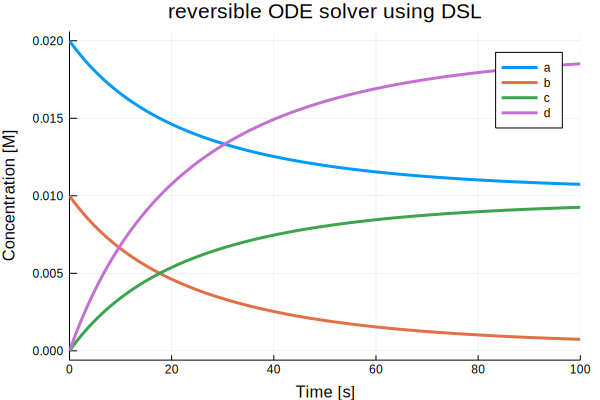

In [34]:
tspan = (0.0,100.0)
prob = ODEProblem(simpleODE3!,u₀,tspan,p)
sol = solve(prob)
plot(sol,label=["a","b","c","d"])
title!("reversible ODE solver using DSL")
xlabel!("Time [s]")
ylabel!("Concentration [M]")